# Sto-ZhOpt
In this notebook, we present some synthetic experiments which can be performed with stozhopt

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from stozhopt import StoZhOpt


rnd_state = np.random.RandomState(12)

## Preliminaries
We define some functions that will be used to plot results

In [2]:
#def plot_results(title, S, )

## Convex Functions
First, we consider to optimize a convex function varying the number of directions taken. We'll consider the following function:

$$ f(x) = || Ax||^2 $$

with $A$ a random fixed matrix

In [3]:
d = 100
A = rnd_state.normal(0.0, 1.00, size=(d, d)) 
U, S, V = np.linalg.svd(A)

#S[-1] = 0
#A = U @ np.diag(S) @ V
w, _ = np.linalg.eigh(A.T @ A)

lam = np.max(w)


target_fun = lambda x: 1/2 * np.linalg.norm(A @ x)**2#1/2*np.linalg.norm(A.dot(x))**2

In [7]:
directions = [1, 15, 50, 75, 100]
h = 1e-5
T = 300

S = np.zeros(shape=(len(directions), T+1))

x0 = rnd_state.rand(d)

for i in range(len(directions)):
    x = x0
    l = directions[i]
    alpha = lambda t: 1/t# (l/(d*lam))
    print("[--] l: {}\talpha: {}: {}".format(l, alpha, type(alpha)))
    optimizer = StoZhOpt("spherical", d, l, alpha, h, dtype=np.float32, seed=12)
    S[i][0] = target_fun(x)
    for t in range(1, T+1):
        x = optimizer.step(fun=target_fun, x=x)
        S[i][t] = target_fun(x)
        print("\t[l = {}] f(x)= {}".format(l, target_fun(x)))
    optimizer.reset()

[--] l: 1	alpha: <function <lambda> at 0x7faa1331adc0>: <class 'function'>
1.0
	[l = 1] f(x)= 2035824.1316860688
0.5
	[l = 1] f(x)= 2205173.5637346287
0.3333333333333333
	[l = 1] f(x)= 8230796984.559162
0.25
	[l = 1] f(x)= 10187828908.990639
0.2
	[l = 1] f(x)= 2414702924263.316
0.16666666666666666
	[l = 1] f(x)= 1100500310789173.1
0.14285714285714285
	[l = 1] f(x)= 2476069700499677.5
0.125
	[l = 1] f(x)= 6.78288807114118e+17
0.1111111111111111
	[l = 1] f(x)= 7.655888348627091e+19
0.1
	[l = 1] f(x)= 1.8523490463910076e+21
0.09090909090909091
	[l = 1] f(x)= 1.642187474791302e+22
0.08333333333333333
	[l = 1] f(x)= 1.2003893643174502e+23
0.07692307692307693
	[l = 1] f(x)= 1.2003893643174502e+23
0.07142857142857142
	[l = 1] f(x)= 5.525384875432101e+25
0.06666666666666667
	[l = 1] f(x)= 5.525384875432101e+25
0.0625
	[l = 1] f(x)= 5.525384875432101e+25
0.058823529411764705
	[l = 1] f(x)= 5.525384875432101e+25
0.05555555555555555
	[l = 1] f(x)= 5.525384875432101e+25
0.05263157894736842
	[l = 1

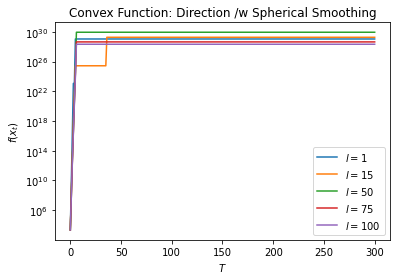

In [5]:
fig, ax = plt.subplots()
ax.set_title("Convex Function: Direction /w Spherical Smoothing")
for i in range(len(directions)):
    ax.plot(range(T+1), S[i], label="$l = ${}".format(directions[i]))

ax.set_xlabel("$T$")
ax.set_ylabel("$f(x_t)$")
ax.set_yscale("log")
ax.legend(loc="best")

## PL-Function

In [6]:
d = 100
A = rnd_state.normal(0.0, 0.20, size=(d, d)) 
U, S, V = np.linalg.svd(A)

S[-1] = 0

A = U @ np.diag(S) @ V


target_fun = lambda x: np.linalg.norm(A @ x)**2#1/2*np.linalg.norm(A.dot(x))**2